### DS-GA-1001       Introduction to Data Science
### Term Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv', header = 0)

In [3]:
df.shape

(39644, 61)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


The dataset is preprocessed.

- Dummy Variables (Binning)
- Correlation? (`is_weekend` and `weekday_is_sunday`)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

**Note: All the variable names (except `url` ) have an extra space on the left. **

In [7]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [8]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


** Target Variable **

In [9]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [10]:
df['shares'].nunique()

1454

In [11]:
df['shares'].value_counts()

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
1000      1177
1600      1137
1700      1013
1800       889
1900       810
2000       774
2100       661
2200       631
2300       511
2400       506
2600       442
2500       441
2700       435
2800       359
2900       356
3000       348
3100       306
3200       282
3400       271
3300       259
3500       252
3800       240
3600       233
3700       223
3900       200
          ... 
38400        1
139500       1
168          1
104          1
53           1
295          1
72100        1
92600        1
309          1
51500        1
277          1
43200        1
39700        1
149          1
67700        1
85           1
59400        1
8            1
80800        1
75600        1
34500        1
50700        1
42400        1
66900        1
72900        1
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64

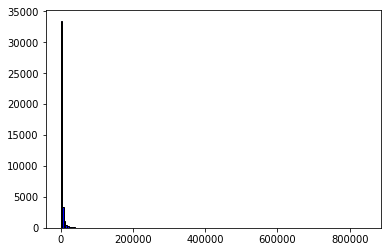

In [12]:
plt.hist(df['shares'], color = 'blue', edgecolor = 'black', bins = 200)
plt.show()

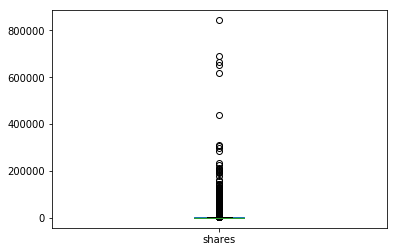

In [13]:
df['shares'].plot(kind = 'box')

In [14]:
filtered = df[df['shares'] <= 4000]

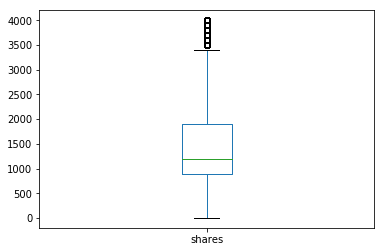

In [15]:
filtered['shares'].plot(kind = 'box')

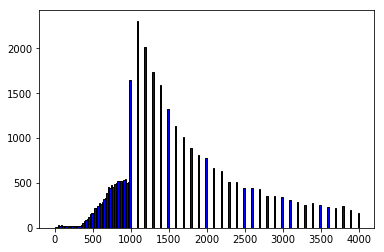

In [16]:
plt.hist(filtered['shares'], color = 'blue', edgecolor = 'black', bins = 200)
plt.show()

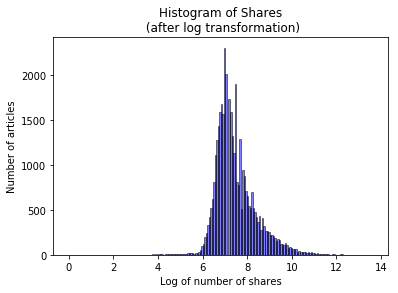

In [17]:
plt.hist(np.log(df['shares']), color = 'blue', edgecolor = 'black', bins = 200, alpha = 0.5)
plt.xlabel('Log of number of shares')
plt.ylabel('Number of articles')
plt.title('Histogram of Shares\n (after log transformation)')
#plt.show()

plt.savefig('hist.png')

In [18]:
#df['popularity_level_2'] = pd.cut(df['shares'], [0, 1400, 82220], labels = ['unpopular', 'popular'])
df['popularity_2_level'] = np.where(df['shares'] <= 1400, 0, 1)
df = df.drop(['url', 'timedelta'], axis = 1)

In [19]:
df.shape
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [20]:
df['popularity_2_level'].value_counts()

0    20082
1    19562
Name: popularity_2_level, dtype: int64

### Feature Selection

- 58 features (6 groups)
- "Naive" methods (correlation)
- Best subset selection
- Stepwise selection
- Regularization (implicit)
- Decision tree (implicit)

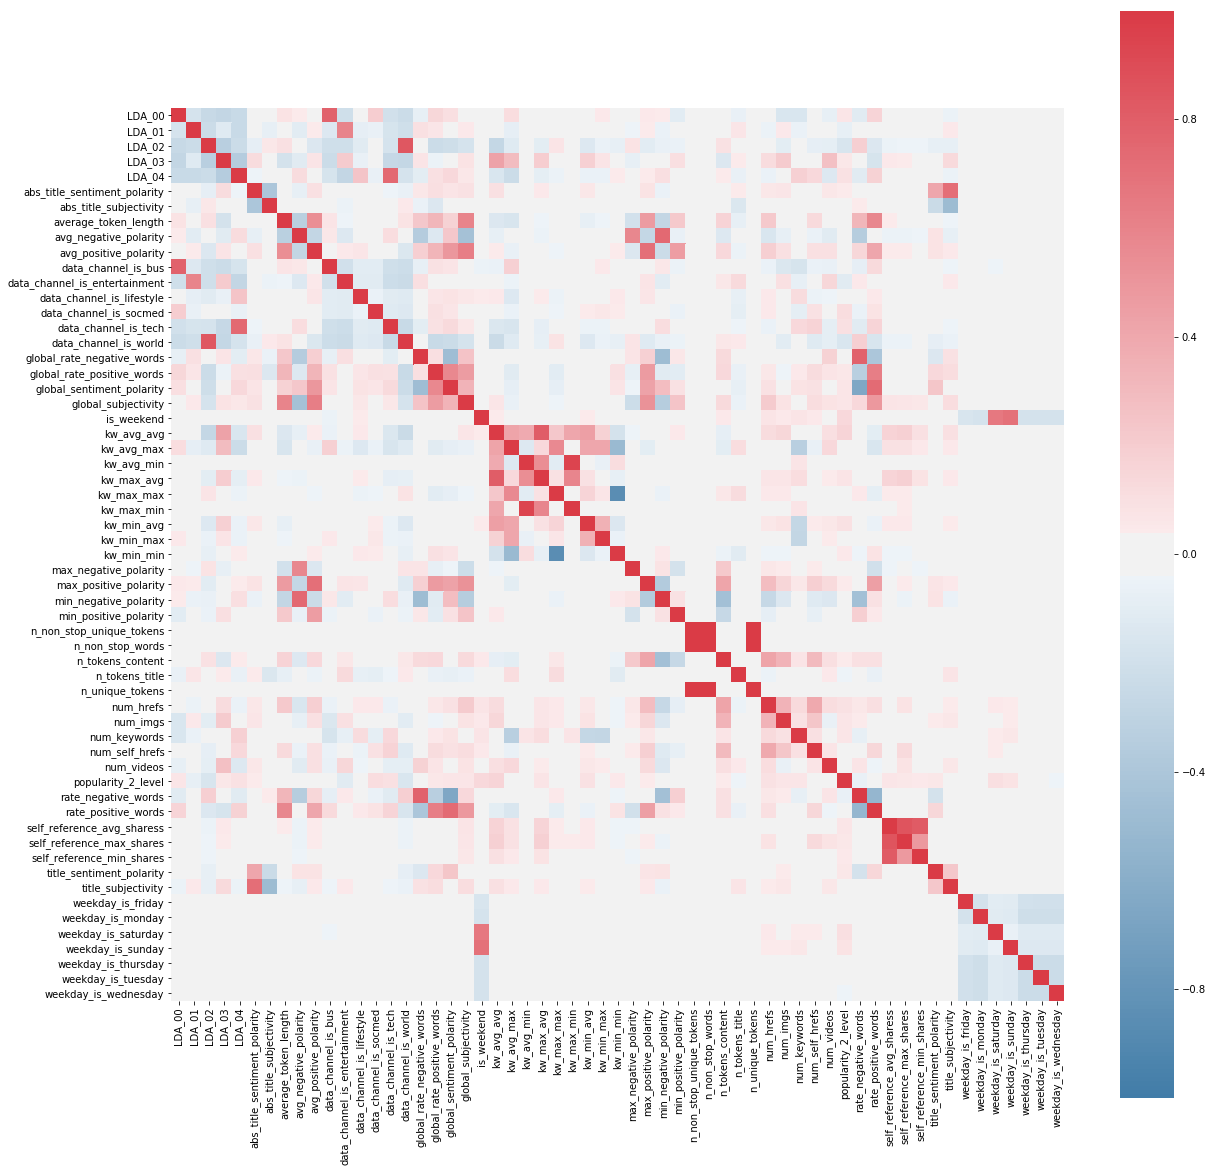

In [21]:
df_corr = df[df.columns.difference(['shares'])]
f, ax = plt.subplots(figsize = (20, 20))
corr = df_corr.corr()

sns.heatmap(corr, vmin = -1.0, vmax = 1.0, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(240, 10, as_cmap = True),
            square = True, ax = ax)
#plt.title('Correlation Matrix for All Features and Target')
#plt.show()

plt.savefig('corr.png')

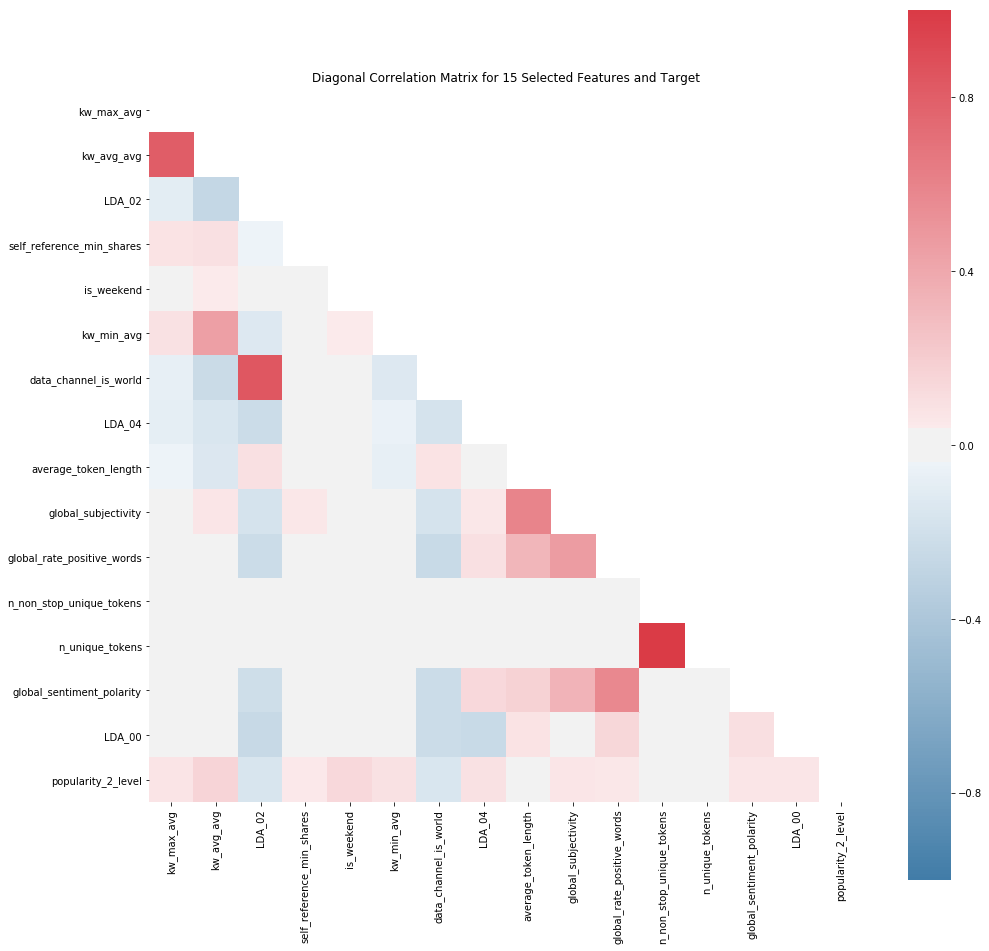

In [36]:
### correlation matrix for selected features

selected_features = ['kw_max_avg', 'kw_avg_avg', 'LDA_02','self_reference_min_shares',
                     'is_weekend', 'kw_min_avg','data_channel_is_world','LDA_04',
                     'average_token_length','global_subjectivity','global_rate_positive_words',
                     'n_non_stop_unique_tokens','n_unique_tokens','global_sentiment_polarity','LDA_00',
                     'popularity_2_level']

df_corr_2 = df[selected_features]

f, ax = plt.subplots(figsize = (16, 16))
corr_2 = df_corr_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_2, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_2, vmin = -1.0, vmax = 1.0, mask = mask, 
            cmap = sns.diverging_palette(240, 10, as_cmap = True),
            square = True, ax = ax)
#plt.show()
plt.title('Diagonal Correlation Matrix for 15 Selected Features and Target')

plt.savefig('corr_2.png')

In [22]:
S = corr['popularity_2_level']
S = S.reindex(S.abs().sort_values(ascending = False).index)
S[1:31]

kw_avg_avg                       0.162057
LDA_02                          -0.156471
data_channel_is_world           -0.150726
is_weekend                       0.137616
data_channel_is_entertainment   -0.110558
data_channel_is_socmed           0.110144
weekday_is_saturday              0.106713
data_channel_is_tech             0.095336
kw_min_avg                       0.092386
num_hrefs                        0.088362
LDA_04                           0.087811
weekday_is_sunday                0.081684
LDA_01                          -0.075640
kw_max_avg                       0.074773
num_keywords                     0.069840
global_sentiment_polarity        0.069656
global_subjectivity              0.067527
rate_negative_words             -0.067057
num_imgs                         0.067000
LDA_00                           0.064819
self_reference_avg_sharess       0.063238
LDA_03                           0.061998
global_rate_positive_words       0.058620
self_reference_max_shares        0

In [23]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy')
df_X = df[df.columns.difference(['shares', 'popularity_2_level'])]
df_Y = df['popularity_2_level']
dtmodel = tree_clf.fit(df_X, df_Y)

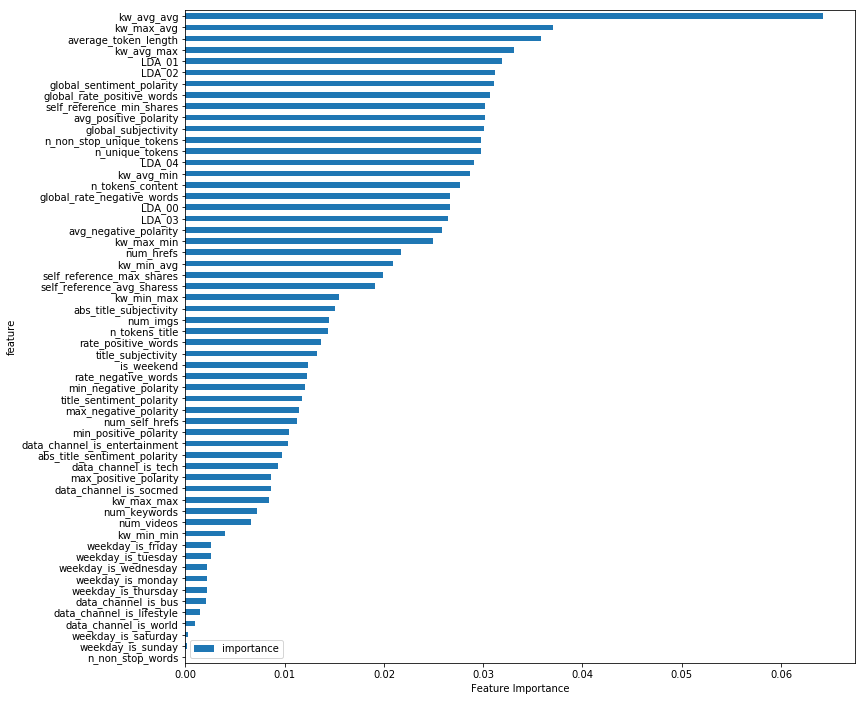

In [25]:
feature_imp = pd.DataFrame({'importance' : dtmodel.feature_importances_})
feature_imp['feature'] = df_X.columns
feature_imp.sort_values(by = 'importance', ascending = True, inplace = True)
feature_imp = feature_imp.set_index('feature', drop = True)
feature_imp.plot.barh(figsize = (12, 12))
plt.xlabel('Feature Importance')
#plt.show()
plt.savefig('feat_imp.png')

In [47]:
feature_imp.sort_values(by = 'importance', ascending = False, inplace = True)
feature_imp[:30]

,importance
feature,
kw_avg_avg,0.061145
kw_max_avg,0.037955
kw_avg_max,0.036327
average_token_length,0.036097
global_subjectivity,0.031985
global_rate_positive_words,0.031585
LDA_01,0.031464
n_non_stop_unique_tokens,0.031134
global_sentiment_polarity,0.030932


In [48]:
feature_imp[:30].index

Index(['kw_avg_avg', 'kw_max_avg', 'kw_avg_max', 'average_token_length',
       'global_subjectivity', 'global_rate_positive_words', 'LDA_01',
       'n_non_stop_unique_tokens', 'global_sentiment_polarity',
       'n_unique_tokens', 'LDA_04', 'self_reference_min_shares', 'LDA_02',
       'avg_positive_polarity', 'LDA_00', 'n_tokens_content', 'kw_avg_min',
       'global_rate_negative_words', 'LDA_03', 'kw_max_min',
       'avg_negative_polarity', 'num_hrefs', 'kw_min_avg',
       'self_reference_avg_sharess', 'self_reference_max_shares', 'kw_min_max',
       'n_tokens_title', 'abs_title_subjectivity', 'num_imgs',
       'rate_negative_words'],
      dtype='object', name='feature')

In [49]:
## 1st set of 30 features using feature importance
selected1 = list(feature_imp[:30].index)
df_X_1 = df_X[selected1]
df_X_1.shape

(39644, 30)

In [50]:
## Recursive Feature Elimination (select 30 features) 
## Using Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 30)
fit = rfe.fit(df_X, df_Y)

In [51]:
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

support = fit.support_
print(df_X.columns[support])

Selected Features: [ True  True  True  True  True False  True  True False False  True  True
  True  True False  True  True False  True  True  True False False False
 False False False False False False False False False  True  True  True
 False False  True False False False False False  True  True False False
 False  True  True  True False  True  True  True  True  True]
Feature Ranking: [ 1  1  1  1  1 15  1  1  7 10  1  1  1  1  4  1  1 27  1  1  1 17 26 23
 20 25 22 19 29 16  9 14  8  1  1  1 18 12  1  6 11  3  5 13  1  1 21 28
 24  1  1  1  2  1  1  1  1  1]
Index(['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'abs_title_subjectivity', 'average_token_length', 'data_channel_is_bus',
       'data_channel_is_entertainment', 'data_channel_is_lifestyle',
       'data_channel_is_socmed', 'data_channel_is_world',
       'global_rate_negative_words', 'global_sentiment_polarity',
       'global_subjectivity', 'is_weekend', 'min_positive_polarity',
       'n_non_stop_unique_tokens'

In [52]:
## 2nd set of 30 features using RFE
selected2 = list(df_X.columns[support])
df_X_2 = df_X[selected2]
print(df_X_2.shape)
#print(df_Y.shape)
#print(df_X.shape)

(39644, 30)


In [53]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(df_X_1, df_Y, test_size = 0.2, random_state = 1001)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(df_X_2, df_Y, test_size = 0.2, random_state = 1001)

### Logistic Regression

- 2 sets of features
- pipeline
- `GridSearchCV` for hyperparameters
- Evaluate on the test set using different metrics

In [54]:
np.random.seed(1001)

In [55]:
## baseline Logistic Regression 
from sklearn.metrics import accuracy_score, roc_curve, auc

# default lr model for the 1st set of features
lr = LogisticRegression()
lr.fit(X_train_1, Y_train_1)
preds_1 = lr.predict(X_test_1)
acc_1 = accuracy_score(Y_test_1, preds_1)
proba_1 = lr.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(Y_test_1, proba_1[:, 1])
roc_auc_1 = auc(fpr, tpr)
print('Accuracy(feat1, baseline): ', acc_1)
print('AUC(feat1, baseline)', roc_auc_1)

Accuracy(feat1, baseline):  0.6143271534871989
AUC(feat1, baseline) 0.6581520808848


In [56]:
# default lr model for the 2nd set of features

lr = LogisticRegression()
lr.fit(X_train_2, Y_train_2)
preds_2 = lr.predict(X_test_2)
acc_2 = accuracy_score(Y_test_2, preds_2)
proba_2 = lr.predict_proba(X_test_2)
fpr, tpr, thresholds = roc_curve(Y_test_2, proba_2[:, 1])
roc_auc_2 = auc(fpr, tpr)
print('Accuracy(feat2, baseline): ', acc_2)
print('AUC(feat2, baseline)', roc_auc_2)

Accuracy(feat2, baseline):  0.6302181864043385
AUC(feat2, baseline) 0.6807488169089906


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
         ('lr', LogisticRegression())]

pipeline = Pipeline(steps)

param_grid_lr = dict(lr__C = [10**i for i in range(-5, 5)],
                     lr__penalty = ['l1', 'l2'])

kfolds = KFold(n_splits = 5)

lr_grid_search = GridSearchCV(pipeline, param_grid = param_grid_lr, cv = kfolds, scoring = 'roc_auc')

In [58]:
lr_grid_search.fit(X_train_1, Y_train_1)

# best AUC for the 1st set of features
best_1 = lr_grid_search.best_score_
print('best AUC for the 1st set of features: ', best_1)

# best estimator for the 1st set of features
print('best estimator for the 1st set of features:\n', lr_grid_search.best_estimator_)

best AUC for the 1st set of features:  0.6723376151523077
best estimator for the 1st set of features:
 Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [59]:
lr_grid_search.fit(X_train_2, Y_train_2)

# best AUC for the 2nd set of features
best_2 = lr_grid_search.best_score_
print('best AUC for the 2nd set of features: ', best_2)

# best estimator for the 2nd set of features
print('best estimator for the 2nd set of features:\n', lr_grid_search.best_estimator_)

best AUC for the 2nd set of features:  0.6718747204991354
best estimator for the 2nd set of features:
 Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [60]:
## final LR model: 1st set of features, C = 10000, penalty = 'l1'
lr_final = LogisticRegression(C = 10000, penalty = 'l1')
lr_final.fit(X_train_1, Y_train_1)

## Evaluate on the test set
preds = lr_final.predict(X_test_1)
acc = accuracy_score(Y_test_1, preds)
proba = lr_final.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(Y_test_1, proba[:, 1])
roc_auc = auc(fpr, tpr)
print('Accuracy(tuned): ', acc)
print('AUC(tuned)', roc_auc)

Accuracy(tuned):  0.6308487829486694
AUC(tuned) 0.68143305935213


### Decision Tree

In [61]:
## baseline decision tree

from sklearn.tree import DecisionTreeClassifier

## 1st set of features
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train_1, Y_train_1)
preds_1 = clf.predict(X_test_1)
acc_1 = accuracy_score(Y_test_1, preds_1)
proba_1 = clf.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(Y_test_1, proba_1[:, 1])
roc_auc_1 = auc(fpr, tpr)
print('Accuracy(feat1, baseline): ', acc_1)
print('AUC(feat1, baseline): ', roc_auc_1)

Accuracy(feat1, baseline):  0.5642577878673225
AUC(feat1, baseline):  0.5643002725388622


In [62]:
## 2nd set of features

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train_2, Y_train_2)
preds_2 = clf.predict(X_test_2)
acc_2 = accuracy_score(Y_test_2, preds_2)
proba_2 = clf.predict_proba(X_test_2)
fpr, tpr, thresholds = roc_curve(Y_test_2, proba_2[:, 1])
roc_auc_2 = auc(fpr, tpr)
print('Accuracy(feat2, baseline): ', acc_2)
print('AUC(feat2, baseline)', roc_auc_2)

Accuracy(feat2, baseline):  0.5636271913229915
AUC(feat2, baseline) 0.5635581243370268


In [63]:
## hyperparameters: max_depth, min_samples_split, min_samples_leaf

# GridSearchCV (first try)

kfolds = KFold(n_splits = 5)

param_grid_dt = {'max_depth': [5, 10, 15], 'min_samples_split': np.arange(800, 1300, step = 100), 
              'min_samples_leaf': np.arange(50, 200, step = 20)}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid_dt, 
                              cv = kfolds, scoring = 'roc_auc')
dt_grid_search.fit(df_X, df_Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_split': array([ 800,  900, 1000, 1100, 1200]), 'min_samples_leaf': array([ 50,  70,  90, 110, 130, 150, 170, 190])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [64]:
dt_grid_search.best_score_

0.6836401480308408

In [65]:
# best hyperparameters (first try)

dt_grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 70, 'min_samples_split': 800}

In [66]:
from sklearn.metrics import roc_auc_score

def dtmodel1(d, msl, X_train, Y_train, X_test, Y_test):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d, min_samples_leaf = msl)
    clf.fit(X_train, Y_train)
    return roc_auc_score(Y_test, clf.predict_proba(X_test)[:,1])

In [67]:
depths = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
leaves = [int(x) for x in np.linspace(50, 800, 10)]

print(leaves)

[50, 133, 216, 300, 383, 466, 550, 633, 716, 800]


In [69]:
results = {}

for depth in depths:
    results[depth] = []
    for leaf in leaves:
        results[depth].append(dtmodel1(depth, leaf, X_train_1, Y_train_1, X_test_1, Y_test_1))
        
#print(results)

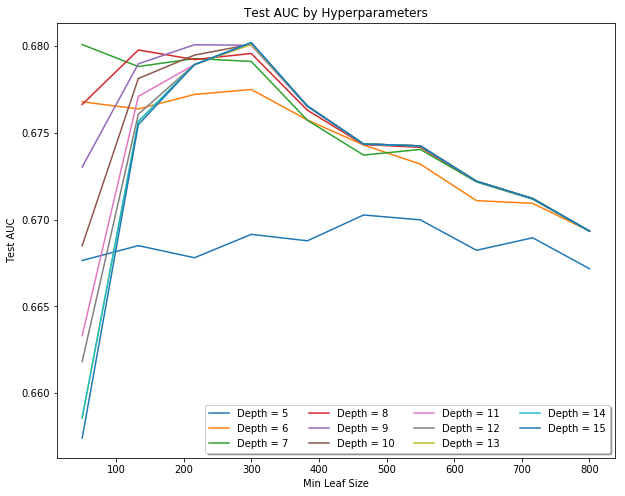

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

for depth in depths:
    plt.plot(leaves, results[depth], 
             label = 'Depth = {}'.format(depth))

#ax.legend(loc = 'upper center', bbox_to_anchor = (1.1, 1), 
          #fancybox = True, shadow = True, ncol = 1, prop = {'size': 10})
    
ax.legend(loc = 4, 
          fancybox = True, shadow = True, ncol = 4, prop = {'size': 10})
    
ax.set_xlabel('Min Leaf Size') 
ax.set_ylabel('Test AUC')
plt.title('Test AUC by Hyperparameters')
#plt.show() 
plt.savefig('tuning1.png')

In [72]:
## possible range for the best hyperparameter values
## depths = [7, 8, 9], min_samples_leaf = (100, 200)

In [73]:
splits = [100, 200, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600]
new_leaves = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [74]:
new_results = {}

for leaf in new_leaves:
    new_results[leaf] = []
    for min_samples_split in splits:
        clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = leaf, max_depth = 8,
                                      min_samples_split = min_samples_split)
        dtmodel = clf.fit(X_train_1, Y_train_1)
        new_results[leaf].append(roc_auc_score(Y_test_1, dtmodel.predict_proba(X_test_1)[:,1]))
        
#print(new_results)

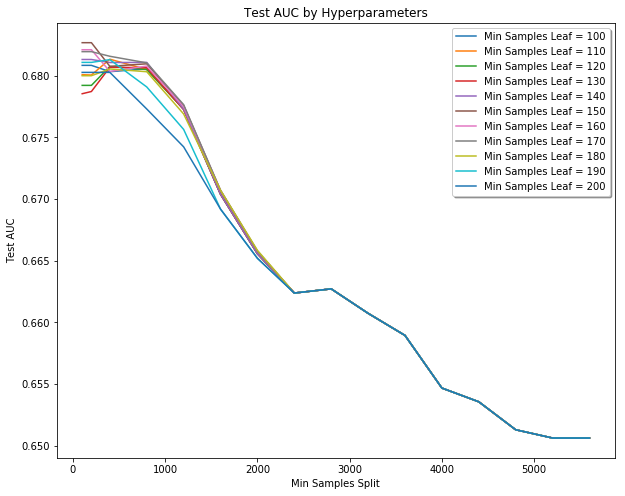

In [75]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

for leaf in new_leaves:
    plt.plot(splits, new_results[leaf], 
             label = 'Min Samples Leaf = {}'.format(leaf))

ax.legend(loc = 'upper right', fancybox = True, shadow = True, ncol = 1, prop = {'size': 10})
ax.set_xlabel('Min Samples Split') 
ax.set_ylabel('Test AUC')
plt.title('Test AUC by Hyperparameters')
#plt.show()
plt.savefig('tuning2.png')

In [96]:
## depths = [7, 8, 9], min_samples_leaf = (100, 200), min_samples_split = (100, 800) 
## Run GridSearchCV again

kfolds = KFold(n_splits = 5)

param_grid_dt = {'max_depth': [7, 8, 9], 'min_samples_split': np.arange(100, 800, step = 100), 
                 'min_samples_leaf': np.arange(50, 150, step = 20)}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid_dt, 
                              cv = kfolds, scoring = 'roc_auc')
dt_grid_search.fit(X_train_1, Y_train_1)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 8, 9], 'min_samples_split': array([100, 200, 300, 400, 500, 600, 700]), 'min_samples_leaf': array([ 50,  70,  90, 110, 130])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [97]:
dt_grid_search.best_score_

0.6679266207515604

In [98]:
dt_grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 130, 'min_samples_split': 600}

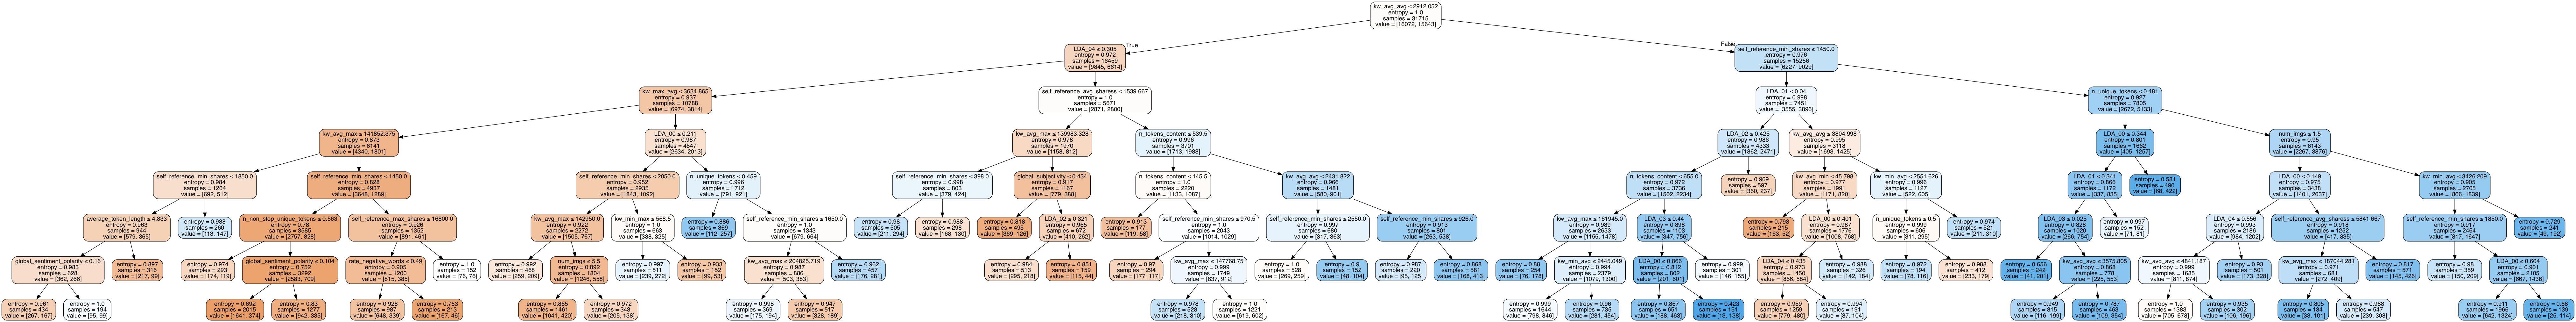

In [77]:
## visualize the optimal tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()


dt_final = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 600, 
                                   min_samples_leaf = 130, max_depth = 7)
dt_final.fit(X_train_1, Y_train_1)

dot_data = StringIO()
tree.export_graphviz(dt_final, out_file = dot_data, feature_names = X_train_1.columns,
                     filled = True, rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png("tree.png")

In [78]:
## Evaluate the optimal tree on the test set

preds = dt_final.predict(X_test_1)
acc = accuracy_score(Y_test_1, preds)
proba = dt_final.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(Y_test_1, proba[:, 1])
roc_auc = auc(fpr, tpr)
print('Accuracy(tuned): ', acc)
print('AUC(tuned)', roc_auc)

Accuracy(tuned):  0.6318577374195989
AUC(tuned) 0.6806028116745647


### Random Forest

In [80]:
## baseline random forest

from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

# default n_estimators is 10
rf = RandomForestClassifier(criterion = 'entropy') 
rf.fit(X_train_1, Y_train_1)

preds_rf = rf.predict(X_test_1)
acc_rf = accuracy_score(Y_test_1, preds_rf)
proba_rf = rf.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(Y_test_1, proba_rf[:, 1])
roc_auc_rf = auc(fpr, tpr)
print('Accuracy(feat1, baseline): ', acc_rf)
print('AUC(feat1, baseline)', roc_auc_rf)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy(feat1, baseline):  0.6116786480010089
AUC(feat1, baseline) 0.6569402278941585


In [81]:
## hyperparameters: n_estimators (others remain the same in the optimal tree)
## max_features - the number of features that will be randomly sampled for each tree.

ntrees = [10, 20, 50, 100, 200, 300, 400, 500]
max_features = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

rf_params = {'n_estimators': ntrees, 'max_features': max_features}
kfolds = KFold(n_splits = 5)

rf_grid_search = GridSearchCV(RandomForestClassifier(criterion = 'entropy', max_depth = 7, 
                                          min_samples_leaf = 130, min_samples_split = 600), 
                                          rf_params, cv = kfolds, scoring = 'roc_auc')
rf_grid_search.fit(X_train_1, Y_train_1)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=130, min_samples_split=600,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 300, 400, 500], 'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [82]:
rf_grid_search.best_score_

0.6920371496994415

In [83]:
rf_grid_search.best_params_

{'max_features': 15, 'n_estimators': 200}

In [84]:
## Evaluate on the test set
rf_final = RandomForestClassifier(criterion = 'entropy', max_depth = 7, 
                                  min_samples_leaf = 130, min_samples_split = 600,
                                  n_estimators = 400)
rf_final.fit(X_train_1, Y_train_1)

preds = rf_final.predict(X_test_1)
acc = accuracy_score(Y_test_1, preds)
proba = rf_final.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(Y_test_1, proba[:, 1])
roc_auc = auc(fpr, tpr)
print('Accuracy(tuned): ', acc)
print('AUC(tuned)', roc_auc)

Accuracy(tuned):  0.649388321351999
AUC(tuned) 0.7006119556938223
